In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
df = pd.read_csv("FFR_data.csv")
df.dropna(inplace=True)

N_SPLITS = 100
TEST_SIZE = 0.25

# Data visualization

To assess the dataset, we can use a pairplot to show the pairwise relationships among the columns.

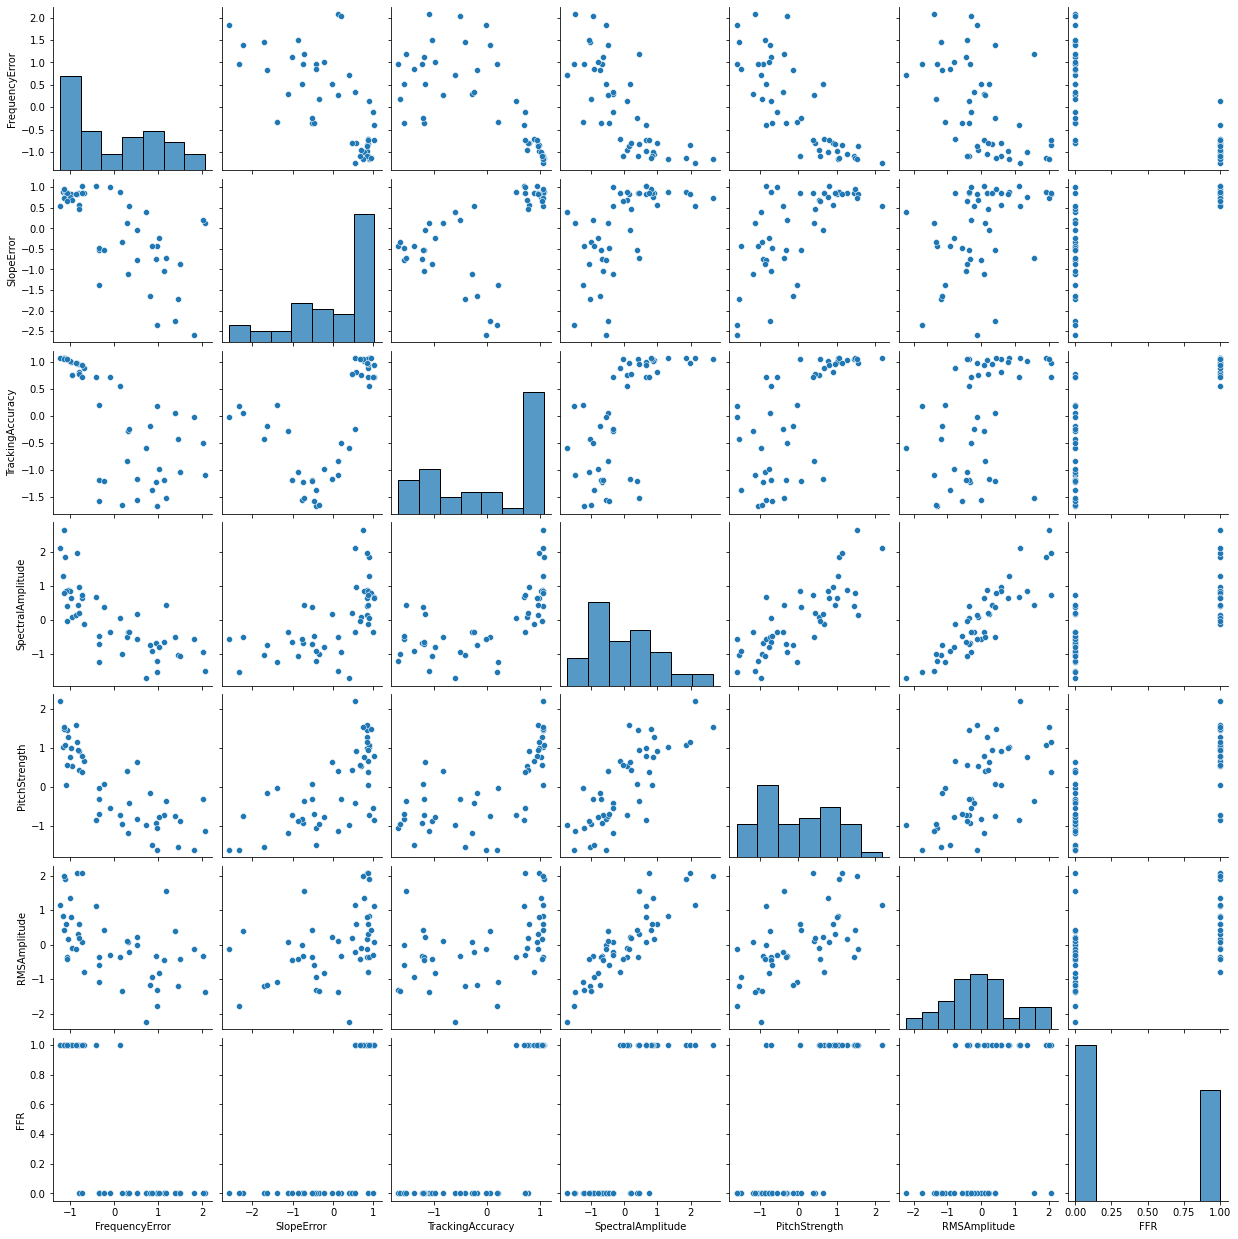

In [10]:
seaborn.pairplot(df)

# Predicting pitch strength using other features aside from FFR

Pitch strength is a continuous variable, so we can use a regression model for this task. Here we choose to use linear regression.

In [11]:
X = df.drop(columns=["FFR", "PitchStrength"]).values
y = df[["PitchStrength"]].values.flatten()

In [12]:
from sklearn.linear_model import LinearRegression
print("Model: Linear regression")

scores = []
for i in range(N_SPLITS):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)
    model = LinearRegression().fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)

print("R^2 score:")
print("Mean: {:.5f}, Std: {:.5f}".format(np.mean(scores), np.std(scores)))

Model: Linear regression
R^2 score:
Mean: 0.63920, Std: 0.25608


# Predicting FFRs using other features
The FFR values are either 0 or 1, so we can use various binary classification models for this task.

In [13]:
X = df.drop(columns=["FFR"]).values
y = df[["FFR"]].values.flatten()

## Supervised learning

In [14]:
from sklearn.linear_model import LogisticRegression
print("Model: Logistic regression")

scores = []
for i in range(N_SPLITS):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)
    model = LogisticRegression().fit(X_train, y_train.flatten())
    score = accuracy_score(model.predict(X_test), y_test)
    scores.append(score)

print("Accuracy:")
print("Mean: {:.5f}, Std: {:.5f}".format(np.mean(scores), np.std(scores)))

Model: Logistic regression
Accuracy:
Mean: 0.90417, Std: 0.06495


In [15]:
from sklearn.svm import SVC
print("Model: Support vector classifier")

scores = []
for i in range(N_SPLITS):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)
    model = SVC().fit(X_train, y_train)
    score = accuracy_score(model.predict(X_test), y_test)
    scores.append(score)

print("Accuracy:")
print("Mean: {:.5f}, Std: {:.5f}".format(np.mean(scores), np.std(scores)))

Model: Support vector classifier
Accuracy:
Mean: 0.91667, Std: 0.06236


In [16]:
from sklearn.neighbors import KNeighborsClassifier
print("Model: k-nearest neighbors")

scores = []
for i in range(N_SPLITS):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)
    model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
    score = accuracy_score(model.predict(X_test), y_test)
    scores.append(score)

print("Accuracy:")
print("Mean: {:.5f}, Std: {:.5f}".format(np.mean(scores), np.std(scores)))

Model: k-nearest neighbors
Accuracy:
Mean: 0.92417, Std: 0.06357


## Unsupervised learning

In [17]:
from sklearn.cluster import KMeans
print("Model: k-means clustering")

scores = []
for i in range(N_SPLITS):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)
    model = KMeans(n_clusters=2).fit(X)
    y_pred = model.predict(X)
    score = accuracy_score(y, y_pred)
    score = max(score, 1 - score)  # The labels could be inverted
    scores.append(score)

print("Accuracy:")
print("Mean: {:.5f}, Std: {:.5f}".format(np.mean(scores), np.std(scores)))

Model: k-means clustering
Accuracy:
Mean: 0.93750, Std: 0.00000
